In [1]:
# Import Libraries


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split




In [2]:
# Load Dataset or Create Dataset


data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 1, 2, 6, 7, 8, 3, 5, 4],
    'Previous_Attempts': [3, 2, 2, 1, 1, 1, 4, 3, 2, 1, 1, 3, 2, 2],
    'Passed_Exam': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
}

df = pd.DataFrame(data)



In [4]:
# View / Preprocess



print(df.head())                                          # View first few rows


print("\nMissing values:\n", df.isnull().sum())           # Check for missing values


print("\nData summary:\n", df.describe())                 # Basic statistics



   Hours_Studied  Previous_Attempts  Passed_Exam
0              1                  3            0
1              2                  2            0
2              3                  2            0
3              4                  1            1
4              5                  1            1

Missing values:
 Hours_Studied        0
Previous_Attempts    0
Passed_Exam          0
dtype: int64

Data summary:
        Hours_Studied  Previous_Attempts  Passed_Exam
count      14.000000          14.000000    14.000000
mean        4.071429           2.000000     0.571429
std         2.200150           0.960769     0.513553
min         1.000000           1.000000     0.000000
25%         2.250000           1.000000     0.000000
50%         4.000000           2.000000     1.000000
75%         5.750000           2.750000     1.000000
max         8.000000           4.000000     1.000000


In [7]:
# Split The Data


X = df[['Hours_Studied', 'Previous_Attempts']]
y = df['Passed_Exam']


X_train, X_test, y_train, y_test = train_test_split(       # Split into training and testing sets (80% train, 20% test)
    X, y, test_size=0.2, random_state=42
)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (11, 2)
X_test shape: (3, 2)
y_train shape: (11,)
y_test shape: (3,)


In [9]:
#  Build the Logistic Regression Model



model = LogisticRegression()                 # Initialize and train model
model.fit(X_train, y_train)




LogisticRegression()

In [12]:
# Test & Evaluate


y_pred = model.predict(X_test)              # Make predictions on test data

print("Predicted Labels:", y_pred)
print("Actual Labels:   ", list(y_test.values))



Predicted Labels: [1 0 0]
Actual Labels:    [np.int64(1), np.int64(0), np.int64(0)]


In [14]:
# Performance Analysis

from sklearn.metrics import classification_report


print("Classification Report:\n")                             # Print classification report
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



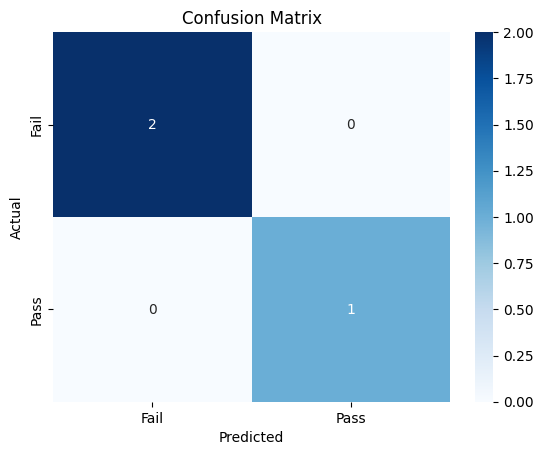

In [15]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)           # Generate confusion matrix

# Plot it
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
# Accuracy Score

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy Score: 1.00
